In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\syeda\OneDrive\Desktop\azam\healthcare_noshows.csv")
print("Dataset Shape:", df.shape)
print("Missing Values:", df.isnull().sum())
print("No-show Distribution:", df['Showed_up'].value_counts())

Dataset Shape: (106987, 15)
Missing Values: PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64
No-show Distribution: Showed_up
True     85307
False    21680
Name: count, dtype: int64


In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [4]:
df.rename(columns={
'Hipertension': 'Hypertension',
'Handcap': 'Handicap',
'SMS_received': 'SMS_Received',
'No-show': 'NoShow'
}, inplace=True)

In [5]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [6]:
df['Scholarship'] = df['Scholarship'].astype(int)
df['Hypertension'] = df['Hypertension'].astype(int)
df['Diabetes'] = df['Diabetes'].astype(int)
df['Alcoholism'] = df['Alcoholism'].astype(int)
df['Handicap'] = df['Handicap'].astype(int)
df['SMS_Received'] = df['SMS_Received'].astype(int)
df['Showed_up'] = df['Showed_up'].astype(int)

In [7]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1,41


In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  int64         
 8   Hypertension    106987 non-null  int64         
 9   Diabetes        106987 non-null  int64         
 10  Alcoholism      106987 non-null  int64         
 11  Handicap        106987 non-null  int64         
 12  SMS_Received    106987 non-null  int64         
 13  Showed_up       106987 non-null  int64         
 14  Date.diff       106987 non-null  int

In [10]:
df['AppointmentWeekday'] = df['AppointmentDay'].dt.dayofweek
df['AppointmentMonth'] = df['AppointmentDay'].dt.month
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

In [11]:
le_gender = LabelEncoder()
df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])

In [12]:
df["Showed_up"].value_counts()

Showed_up
1    85307
0    21680
Name: count, dtype: int64

In [13]:
df['AgeGroup'] = pd.cut(df['Age'],
bins=[0, 18, 30, 45, 60, 120],
labels=['0-18', '19-30', '31-45', '46-60', '60+'])

In [14]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Showed_up,Date.diff,AppointmentWeekday,AppointmentMonth,ScheduledHour,Gender_Encoded,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,4,4,0,0,60+
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,4,4,0,1,46-60
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,4,4,0,0,60+
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,4,4,0,0,0-18
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,4,4,0,0,46-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1,35,1,6,0,0,46-60
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1,35,1,6,0,0,46-60
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1,41,1,6,0,0,19-30
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1,41,1,6,0,0,31-45


In [15]:
patient_stats = df.groupby('PatientId').agg({
'Showed_up': ['count', 'sum', 'mean']
}).reset_index()
patient_stats.columns = ['PatientId', 'TotalAppointments',
'TotalShow_ups', 'Show_Up_Rate']
patient_stats

,PatientId,TotalAppointments,TotalShow_ups,Show_Up_Rate
0,3.921784e+04,1,1,1.0
1,4.374176e+04,1,1,1.0
2,9.377953e+04,1,1,1.0
3,1.417242e+05,1,1,1.0
4,5.376153e+05,1,1,1.0
...,...,...,...,...
60265,9.999320e+14,5,5,1.0
60266,9.999350e+14,1,1,1.0
60267,9.999465e+14,1,1,1.0
60268,9.999686e+14,1,1,1.0


In [16]:
df = df.merge(patient_stats, on='PatientId', how='left')

In [17]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Showed_up,Date.diff,AppointmentWeekday,AppointmentMonth,ScheduledHour,Gender_Encoded,AgeGroup,TotalAppointments,TotalShow_ups,Show_Up_Rate
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,1,0,4,4,0,0,60+,2,2,1.00
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,1,0,4,4,0,1,46-60,2,2,1.00
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,1,0,4,4,0,0,60+,2,2,1.00
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,1,0,4,4,0,0,0-18,2,1,0.50
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,1,0,4,4,0,0,46-60,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,...,1,35,1,6,0,0,46-60,2,1,0.50
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,...,1,35,1,6,0,0,46-60,4,3,0.75
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,...,1,41,1,6,0,0,19-30,1,1,1.00
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,...,1,41,1,6,0,0,31-45,2,2,1.00


<Axes: xlabel='Showed_up', ylabel='Gender'>

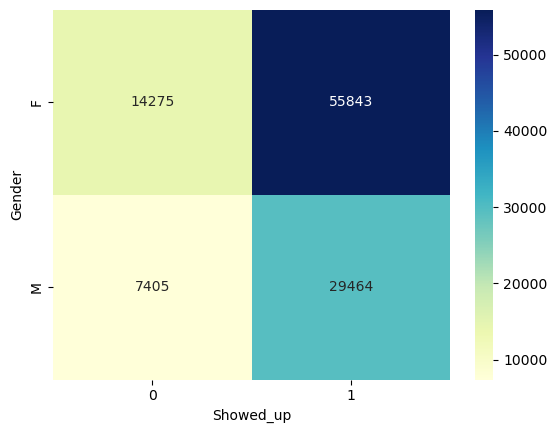

In [18]:
sns.heatmap(df.groupby(['Gender','Showed_up']).size().unstack(), annot=True, fmt='d', cmap='YlGnBu')

<Axes: xlabel='Showed_up', ylabel='SMS_Received'>

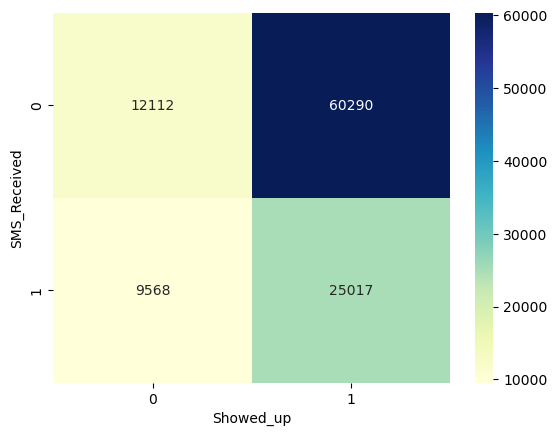

In [19]:
sns.heatmap(df.groupby(['SMS_Received','Showed_up']).size().unstack(), annot=True, fmt='d', cmap='YlGnBu')

C:\Users\syeda\AppData\Local\Temp\ipykernel_17672\3101281200.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df.groupby(['AgeGroup','Showed_up']).size().unstack(), annot=True, fmt='d', cmap='RdYlGn')


<Axes: xlabel='Showed_up', ylabel='AgeGroup'>

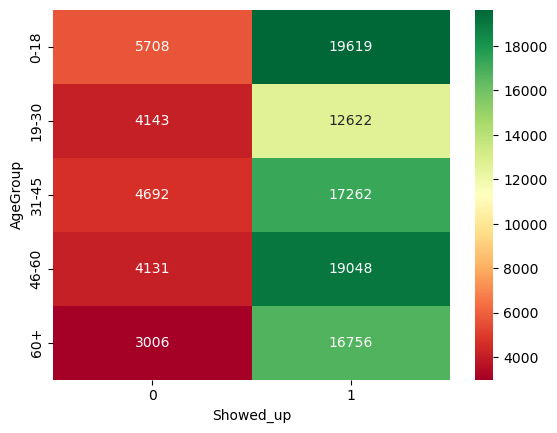

In [20]:
sns.heatmap(df.groupby(['AgeGroup','Showed_up']).size().unstack(), annot=True, fmt='d', cmap='RdYlGn')

In [21]:
df[df["Date.diff"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Showed_up,Date.diff,AppointmentWeekday,AppointmentMonth,ScheduledHour,Gender_Encoded,AgeGroup,TotalAppointments,TotalShow_ups,Show_Up_Rate
26222,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,...,0,-1,0,5,0,1,31-45,5,4,0.800000
53324,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,...,0,-1,1,5,0,0,19-30,8,6,0.750000
62055,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,...,0,-1,2,5,0,0,19-30,2,0,0.000000
69225,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,...,0,-6,3,5,0,0,60+,3,1,0.333333
70039,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,...,0,-1,1,5,0,1,0-18,5,4,0.800000


In [22]:
df['Date.diff'] = np.where(df['Date.diff'] < 0, 0, df['Date.diff'])

In [23]:
df[df["Date.diff"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Showed_up,Date.diff,AppointmentWeekday,AppointmentMonth,ScheduledHour,Gender_Encoded,AgeGroup,TotalAppointments,TotalShow_ups,Show_Up_Rate


In [24]:
df['Date.diff'].max()

179

In [25]:
df['Date_diff_Group'] = pd.cut(df['Date.diff'],
bins = [-1, 0, 30, 90, 180],
labels = ['Day 0', '1-30 Days', '31-90 Days', '91-180 Days'])

In [26]:
df["Date_diff_Group"].value_counts()

Date_diff_Group
1-30 Days      59832
Day 0          37159
31-90 Days      9784
91-180 Days      212
Name: count, dtype: int64

C:\Users\syeda\AppData\Local\Temp\ipykernel_17672\1904741357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df.groupby(['Date_diff_Group','Showed_up']).size().unstack(), annot=True, fmt='d', cmap='Spectral')


<Axes: xlabel='Showed_up', ylabel='Date_diff_Group'>

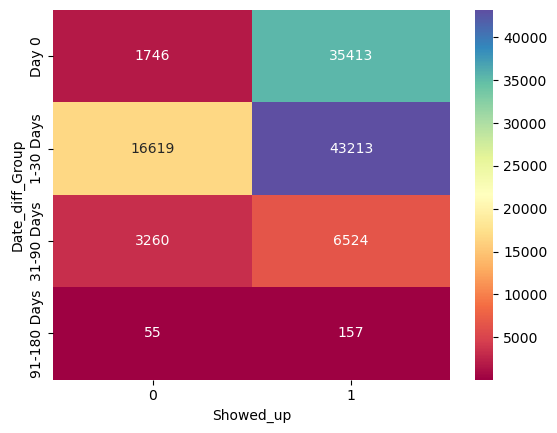

In [27]:
sns.heatmap(df.groupby(['Date_diff_Group','Showed_up']).size().unstack(), annot=True, fmt='d', cmap='Spectral')

In [28]:
features = [
'Age',
'Gender_Encoded',
'Scholarship',
'Hypertension',
'Diabetes',
'Alcoholism',
'Handicap',
'SMS_Received',
'Date.diff',
'AppointmentWeekday',
'AppointmentMonth' 
]
X = df[features]
y = df['Showed_up']
X = X.fillna(0)

In [29]:
X

,Age,Gender_Encoded,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Date.diff,AppointmentWeekday,AppointmentMonth
0,62,0,0,1,0,0,0,0,0,4,4
1,56,1,0,0,0,0,0,0,0,4,4
2,62,0,0,0,0,0,0,0,0,4,4
3,8,0,0,0,0,0,0,0,0,4,4
4,56,0,0,1,1,0,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
106982,56,0,0,0,0,0,0,1,35,1,6
106983,51,0,0,0,0,0,0,1,35,1,6
106984,21,0,0,0,0,0,0,1,41,1,6
106985,38,0,0,0,0,0,0,1,41,1,6


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
dt_model = DecisionTreeClassifier(
criterion='gini',
max_depth=8,
min_samples_split=100,
min_samples_leaf=50,
random_state=42
)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

In [32]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred_test,
target_names=['NoShow', 'Show']))


Training Accuracy: 0.7980
Testing Accuracy: 0.7977
              precision    recall  f1-score   support

      NoShow       0.54      0.01      0.02      4336
        Show       0.80      1.00      0.89     17062

    accuracy                           0.80     21398
   macro avg       0.67      0.50      0.46     21398
weighted avg       0.75      0.80      0.71     21398



Text(0.5, 1.0, 'Confusion Matrix')

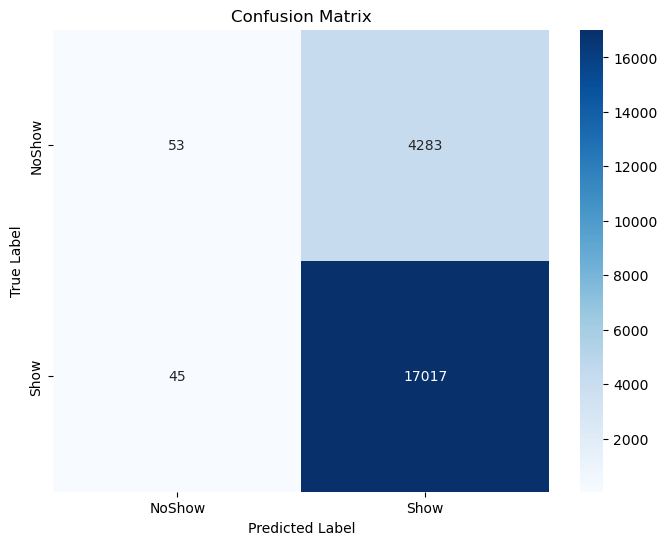

In [33]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NoShow','Show'], yticklabels=['NoShow','Show'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [34]:
feature_importance = pd.DataFrame({
'Feature': features,
'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)


               Feature  Importance
8            Date.diff    0.774148
0                  Age    0.148659
7         SMS_Received    0.025938
9   AppointmentWeekday    0.012791
2          Scholarship    0.011544
1       Gender_Encoded    0.010209
5           Alcoholism    0.005784
3         Hypertension    0.004508
10    AppointmentMonth    0.002809
6             Handicap    0.002502
4             Diabetes    0.001109


In [35]:
df['Predicted_Show_up'] = dt_model.predict(X)
df['Show_up_Probability'] = dt_model.predict_proba(X)[:, 1]
df['RiskCategory'] = pd.cut(
df['Show_up_Probability'],
bins=[0, 0.5, 0.75, 1.0],
labels=['High Risk', 'Medium Risk','Low Risk' ]
)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,ScheduledHour,Gender_Encoded,AgeGroup,TotalAppointments,TotalShow_ups,Show_Up_Rate,Date_diff_Group,Predicted_Show_up,Show_up_Probability,RiskCategory
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,60+,2,2,1.00,Day 0,1,0.969620,Low Risk
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,1,46-60,2,2,1.00,Day 0,1,0.962469,Low Risk
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,60+,2,2,1.00,Day 0,1,0.972687,Low Risk
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,0-18,2,1,0.50,Day 0,1,0.944606,Low Risk
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,46-60,1,1,1.00,Day 0,1,0.986111,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,...,0,0,46-60,2,1,0.50,31-90 Days,1,0.742991,Medium Risk
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,...,0,0,46-60,4,3,0.75,31-90 Days,1,0.742991,Medium Risk
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,...,0,0,19-30,1,1,1.00,31-90 Days,1,0.624057,Medium Risk
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,...,0,0,31-45,2,2,1.00,31-90 Days,1,0.678809,Medium Risk


In [36]:
export_columns = [
'PatientId', 'AppointmentID', 'Gender', 'Age', 'AgeGroup',
'ScheduledDay', 'AppointmentDay', 'AppointmentWeekday',
'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
'Alcoholism', 'Handicap', 'SMS_Received', 'Date.diff',
'Showed_up', 'Predicted_Show_up', 'Show_up_Probability', 'RiskCategory'
]
df[export_columns].to_csv('appointment_predictions.csv', index=False)
print("Data exported for Power BI successfully!")


Data exported for Power BI successfully!
